In [2]:
import numpy as np
from matplotlib import pylab as plt
from matplotlib import style

In [3]:
%time
# definimos el número de matrices y la precisión
matrix_number = np.power(10, 6)
precision = 1/np.power(10, 6)

# Generamos un arreglo aleatorio de matrices
matrix = np.random.uniform(-1, 1, size=(matrix_number, 2, 2))

# Calculamos en 2 arreglos distintos los determinantes y trazas de las matrices
det = np.linalg.det(matrix)
traces = np.trace(matrix, axis1=1, axis2=2)


Wall time: 0 ns


# Condiciones

In [4]:
%time
# Condiciones que definen (con una presicion definida) las regiones del diagrama de Poincare. Util para clasificar los puntos
def positive_det():
  return det > 0 - precision

def negative_det():
  return det < 0 - precision

def positive_Delta():
  return np.power(traces, 2) - 4*det > precision

def negative_Delta():
  return np.power(traces, 2) - 4*det < -1*precision

def positive_trace():
  return traces > 0 + precision

def negative_trace():
  return traces < 0 - precision


# Funciones que corresponden a cada posible solución y retornan las condiciones que deben cumplir estas en el retrato de fase 
def saddle_condition():
    return negative_det()

def spiral_sink_condition(): 
    return negative_Delta() & negative_trace()

def spiral_source_condition(): 
    return negative_Delta() & positive_trace()

def sink_condition(): 
    return positive_Delta() & negative_trace() & positive_det()

def source_condition():
    return positive_Delta() & positive_trace() & positive_det()

def center_condition():
    return np.abs(traces) < precision

def uniform_motion_condition():
    return (np.abs(traces) < precision) & (np.abs(det) < precision)
  
def unstable_fixed_point_condition():
    return (np.abs(det) < precision) & positive_trace()

def stable_fixed_point_condition():
    return (np.abs(det) < precision) & negative_trace()

def degenerate_source_condition():
  return (np.abs(np.power(traces, 2) - 4*det) < precision) & positive_trace()

def degenerate_sink_condition():
  return (np.abs(np.power(traces, 2) - 4*det) < precision) & negative_trace()

# Función para calcular las proporciones
def percentage(condition):
  return len(traces[condition()])/matrix_number*100

Wall time: 0 ns


# Gráfica


Wall time: 0 ns


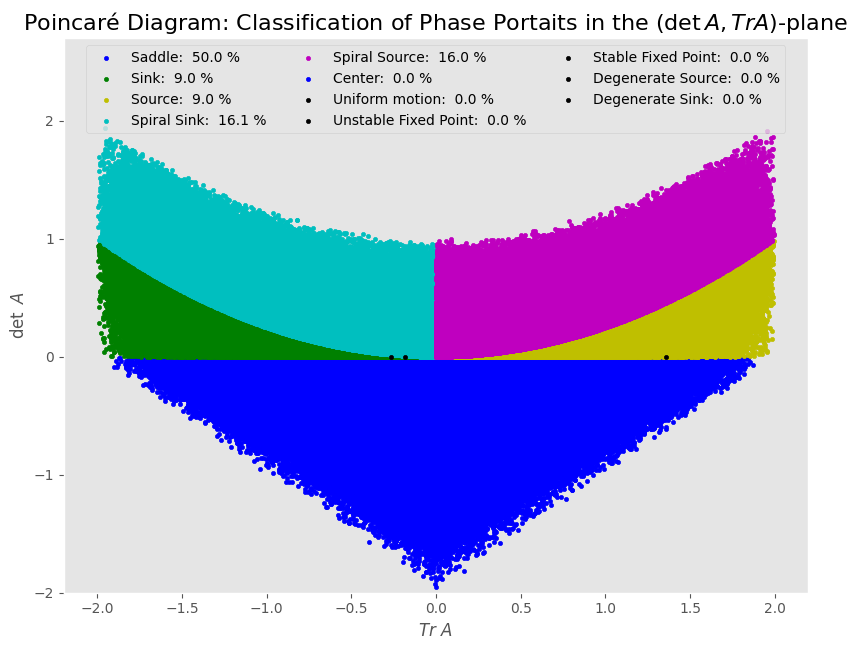

<Figure size 640x480 with 0 Axes>

In [5]:
%time
plt.style.use('ggplot')
fig = plt.figure(figsize=(9.6, 7.2)) # Aumentamos el tamaño de la figura para ubicar bien el legend

# Graficamos los puntos de los arreglos de determinantes y trazas que cumplen cada condición (correspondiente a un tipo de solución en el retrato de fase)
plt.scatter(traces[saddle_condition()], det[saddle_condition()], marker='.', c='b', label = f'Saddle: {percentage(saddle_condition): .1f} %')
plt.scatter(traces[sink_condition()], det[sink_condition()], marker='.', c='g', label = f'Sink: {percentage(sink_condition): .1f} %')
plt.scatter(traces[source_condition()], det[source_condition()], marker='.', c='y', label = f'Source: {percentage(source_condition): .1f} %')
plt.scatter(traces[spiral_sink_condition()], det[spiral_sink_condition()], marker='.', c='c', label = f'Spiral Sink: {percentage(spiral_sink_condition): .1f} %')
plt.scatter(traces[spiral_source_condition()], det[spiral_source_condition()], marker='.', c='m', label = f'Spiral Source: {percentage(spiral_source_condition): .1f} %')
plt.scatter(traces[center_condition()], det[center_condition()], marker='.', c='b', label = f'Center: {percentage(center_condition): .1f} %')
plt.scatter(traces[uniform_motion_condition()], det[uniform_motion_condition()], marker='.', c='k', label = f'Uniform motion: {percentage(uniform_motion_condition): .1f} %')
plt.scatter(traces[unstable_fixed_point_condition()], det[unstable_fixed_point_condition()], marker='.', c='k', label = f'Unstable Fixed Point: {percentage(unstable_fixed_point_condition): .1f} %')
plt.scatter(traces[stable_fixed_point_condition()], det[stable_fixed_point_condition()], marker='.', c='k', label = f'Stable Fixed Point: {percentage(stable_fixed_point_condition): .1f} %')
plt.scatter(traces[degenerate_source_condition()], det[degenerate_source_condition()], marker='.', c='k', label = f'Degenerate Source: {percentage(degenerate_source_condition): .1f} %')
plt.scatter(traces[degenerate_sink_condition()], det[degenerate_sink_condition()], marker='.', c='k', label = f'Degenerate Sink: {percentage(degenerate_sink_condition): .1f} %')

plt.ylim(-2, 2.7)
plt.xlabel(f"$Tr \ A$")
plt.ylabel(f"$\det \ A$")
plt.title(f"Poincaré Diagram: Classification of Phase Portaits in the $(\det A, Tr A)$-plane", size='16')
plt.legend(ncol = 3, fontsize = 10, loc = 'upper center')
plt.grid()
plt.show()

plt.savefig('Poincaré Diagram.pdf')

# Diagrama de barras

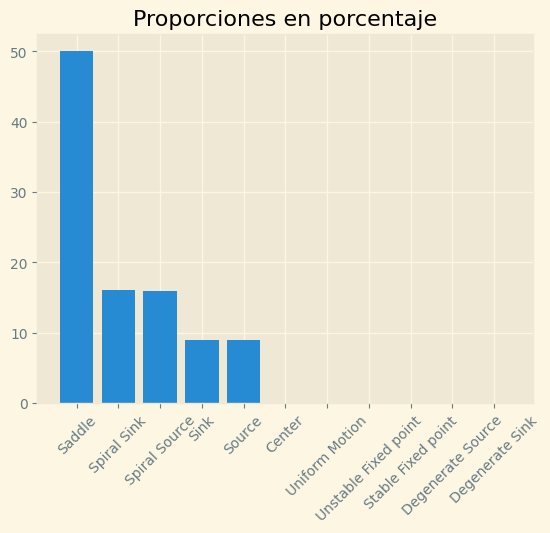

In [6]:
plt.style.use('Solarize_Light2')
plt.xticks(rotation=45)
plt.title('Proporciones en porcentaje')
plt.bar(['Saddle', 'Spiral Sink', 'Spiral Source', 'Sink', 'Source', 'Center', 'Uniform Motion', 'Unstable Fixed point', 'Stable Fixed point', 'Degenerate Source', 'Degenerate Sink'], [percentage(saddle_condition), percentage(spiral_sink_condition), percentage(spiral_source_condition), percentage(sink_condition), percentage(source_condition), percentage(center_condition), percentage(uniform_motion_condition), percentage(unstable_fixed_point_condition), percentage(stable_fixed_point_condition), percentage(degenerate_source_condition), percentage(degenerate_sink_condition) ])
plt.savefig('Proporciones.pdf')

In [1]:
from scipy import linalg
import numpy as np
import time # use time.process_time_ns() , compare with monotonic_ns()

MINSIZE=1
MAXSIZE=5000
NSAMPLES=10
data = np.zeros((NSAMPLES, 3))
# YOUR CODE HERE

# N IS NOT A INTEGER
N = np.geomspace(MINSIZE, MAXSIZE, NSAMPLES, dtype= np.int64)

# Seed is not controlled

# start= time.process_time_ns()
start = time.monotonic_ns()
A = np.random.rand(N[-1], N[-1])
kappa = linalg.norm(A) * linalg.norm(linalg.inv(A))
end = time.monotonic_ns()
# end = time.process_time_ns()

for ii in range(len(N)):
    A = np.random.rand(N[ii], N[ii])
    start = time.process_time_ns()
    #start = time.monotonic_ns()
    kappa = linalg.norm(A)*linalg.norm(linalg.inv(A))
    end = time.process_time_ns()
    #end = time.monotonic_ns()
    #print(f"{kappa=}")
    print(f"{N[ii]}\t {(end - start)*1.0e-9}")

1	 0.0
2	 0.0
6	 0.0
17	 0.0
44	 0.0
113	 0.046875
292	 0.015625
753	 0.078125
1940	 1.9531250000000002
5000	 27.421875
